## Holly Figueroa
## DSC 550 Milestone 1: Employee Mental Health & Workplace MH Culture

### *Milestone Requirements*
*Begin Milestone 1 with a ***250-500-word narrative*** describing your original idea for the analysis/model building business problem. Clearly identify the problem you will address and the target for your model. Then, do **a graphical analysis creating a minimum of four graphs**. Label your graphs appropriately and **explain/analyze the information provided by each graph**. Your analysis should begin to answer the question(s) you are addressing. **Write a short overview/conclusion** of the insights gained from your graphical analysis.*

### Narrative  
Mental health struggles have been long stigmatized within society despite its prevalence across populations. As companies compete to retain effective talent, workplace mental health culture may be added to the list of qualities that set one company apart from another. The analyses done for this project will assume that a company will be interested in better supporting employee mental health as it pertains to work culture, productivity, retention, and attracting new hires. 

First it must be established that mental health is a prevalent issue warranting employer attention. If it is, creating a better workplace culture around mental health requires employee perceptions be explored as well as company practices.  I have survey data results from workers, with a variety of employers, mostly in the tech field. My dataset contains a variety of features that seek to capture prevalence of mental health concerns as well as perceptions of how their employer values mental health through culture, benefits, and accommodations. Nearly all variables in the dataset are categorical. Many are based on Likert responses, some binary, some organized, some not.  Given the data types and available labeled data for target features, classifier modeling appears to be the best choice. 

A model to capable of classifying those with high rates of work interference from mental health can be used inform company practices. By creating the best working model to predict mental health interference as its target, an employer can begin to evaluate features against their own workplace practices, culture, and benefits to improve employee wellness and performance. To achieve a quality model the following questions will be examined from the dataset:

* How common is work interference due to mental health?
* Is work interference related to the perception of negative consequences for talking about mental health needs?
* Is work interference distributed differently for employees that work remotely?
* How are features of interest distributed?
* What features cooperate best to predict work interference?
* What features are closely related/redundant and may need to be removed?
* Are the best features to predict work interference different for employees who work from home?

After EDA, analysis will begin with targeting work interference, but it may be preferable for a company to target an employee's perceptions of negative consequences from discussing mental health with supervisors. While an employee may privately choose to forgo resources, treatment, or employer accommodations for mental health, their sense of safety to discuss concerns could reflect the most about company culture around mental health than anything else. 

### EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load file created of variable despriptions for reference - 
var_info = pd.read_csv('var_info_df.csv')

# Load csv data file in to df
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
# Display variables and their descriptions for reference
with pd.option_context('display.max_colwidth', None):
  display(var_info.style.set_properties(**{'text-align': 'left'}))

,Variable,Survey Question
0,Age,nan
1,Gender,nan
2,Country,nan
3,state,"If you live in the United States, which state or territory do you live in?"
4,self_employed,Are you self-employed?
5,family_history,Do you have a family history of mental illness?
6,treatment,Have you sought treatment for a mental health condition?
7,work_interfere,"If you have a mental health condition, do you feel that it interferes with your work"
8,no_employees,How many employees does your company or organization have?
9,remote_work,Do you work remotely (outside of an office) at least 50% of the time?


In [4]:
# View shape
df.shape

(1259, 27)

In [5]:
# Create subset of columns to view certain value counts (exclue timestamp, age, and comments)
dfcounts = df.iloc[:,2:-1]

In [6]:
# Itereate over columns and print val counts to get a clearer look at categorical variables
for col in dfcounts:
    print ('{:_^30}'.format(col).upper())
    print(dfcounts[col].value_counts(),'\n')

____________GENDER____________
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Man                                                 2
Female                                              2
Female (trans)                                      2
Cis Male                                            2
Femake                                              1
p                                                   1
cis-female/femme                                   

In [7]:
# Check Age responses
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [8]:
# Use filter out value errors using a value range
df_age = df[(df['Age'] >= 14) & (df['Age'] <= 100)]

Text(0.5, 1.0, 'Respondent Age')

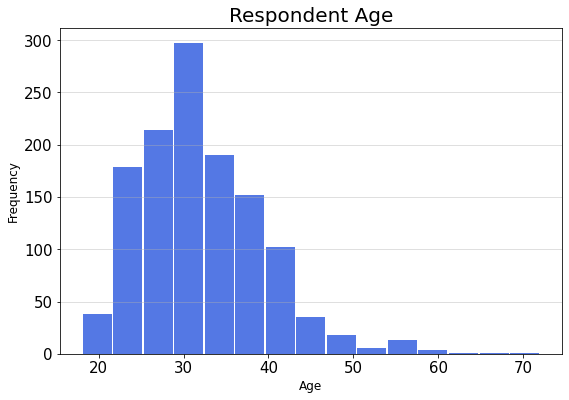

In [9]:
# Create Histogram
fig = plt.figure(figsize =(9,6))
plt.hist(x=df_age['Age'], 
            bins=15, 
            color='royalblue',
            alpha=0.9, 
            rwidth=0.95)

# Create grid and label features for histogram
plt.grid(axis='y', alpha=0.5)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Age',  fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.title('Respondent Age', fontsize = 20)

The histogram above shows the frequecies for age of respondents in the data set after filtering a reasonable range of ages 14-100yrs old. The distribution of ages appears positively skewed, as would be expected for a working population. The ages's mode appears to fall around 30yrs, and the skew likely sending the average higher than 30yrs of age. The visual lends confidence that the sample pool is representative enough for this analysis. 

In [10]:
# Explore the prevealence of work interference and if the prevalence is different for remote employees
# Create variable to store value counts for work interference and view
interfere = df['work_interfere'].value_counts()
interfere

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [11]:
# Store value counts for work interference grouped by remote work status and view
interfere2 = df.groupby('remote_work')['work_interfere'].value_counts()
interfere2

remote_work  work_interfere
No           Sometimes         322
             Never             157
             Rarely            119
             Often              93
Yes          Sometimes         143
             Never              56
             Rarely             54
             Often              51
Name: work_interfere, dtype: int64

In [12]:
# Compare counts using percentages
# Get percentage of all employees reporting often or sometimes work interference from mental health
pc_interfere = (((465+144)/interfere.sum()) * 100)

# Get percentage of tech employees reporting often or sometimes work interference from mental health
pc_remote = (((143+51)/(143+56+54+51)) * 100)

print(round(pc_interfere,2) ,'perent of ALL employees report work interference due to mental health sometimes or often')
print(round(pc_remote,2), 'perent of REMOTE employees report work interference due to mental health sometimes or often')

61.21 perent of ALL employees report work interference due to mental health sometimes or often
63.82 perent of REMOTE employees report work interference due to mental health sometimes or often


In [13]:
# Create Bar chart arrays
# Subset remote workers and get array of value counts for work interference
remote_int = df[df['remote_work']== 'Yes']
remote_int['work_interfere'].value_counts()


Sometimes    143
Never         56
Rarely        54
Often         51
Name: work_interfere, dtype: int64

In [14]:
# Reset Index
remote_int = remote_int['work_interfere'].value_counts().reset_index()
# Add column to sort bars in order of severity
remote_int['Order'] = [3,1,2,4]
# Sort and view
remote_int = remote_int.sort_values(by = 'Order')
remote_int

,index,work_interfere,Order
1,Never,56,1
2,Rarely,54,2
0,Sometimes,143,3
3,Often,51,4


In [15]:
# Create secondary Bar chart arrays for stacking
# Subset remote workers and get array of value counts for work interference
office_int = df[df['remote_work']== 'No']
office_int['work_interfere'].value_counts()

Sometimes    322
Never        157
Rarely       119
Often         93
Name: work_interfere, dtype: int64

In [16]:
# Reset Index
office_int = office_int['work_interfere'].value_counts().reset_index()
# Create new column to be able sort order of table bars
office_int['Order'] = [3,1,2,4]
# Sort and view
office_int = office_int.sort_values(by = 'Order')
office_int

,index,work_interfere,Order
1,Never,157,1
2,Rarely,119,2
0,Sometimes,322,3
3,Often,93,4


In [17]:
office = office_int.iloc[:,1]
office

1    157
2    119
0    322
3     93
Name: work_interfere, dtype: int64

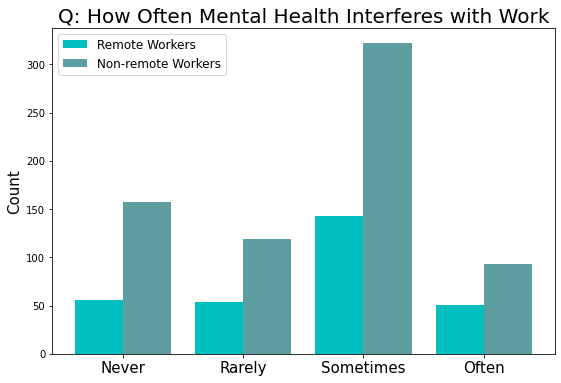

In [18]:
# Create Bar Chart to Visualize distributions for work interference
# Using Dual Bars to compare remote and non remote worker distributions

# Make data arrays
office = office_int.iloc[:,1]
remote = remote_int.iloc[:,1]
x = office_int['index']

# Size 
plt.figure(figsize= (9,6))

# Set columns
N = 4
ind = np.arange(N) 
width = 0.4

# Set bars
bar1 = plt.bar(ind, remote, width, color = 'c')
bar2 = plt.bar(ind+width, office, width, color='cadetblue')

# Create Titles, Axis Labels, and Legend
plt.title('Q: How Often Mental Health Interferes with Work', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
  
plt.xticks(ind+.2, x, fontsize = 15)
plt.legend((bar1, bar2), ('Remote Workers', 'Non-remote Workers') , fontsize = 12)
plt.show()

In [19]:
usa_df = df[df['Country'] == 'United States']

The bar chart above examines responses of how often mental health causes interferece in work. The majority of respondents reported 'Sometimes". If we examine the range of responses it is easy to see, that only minority 'never' experience interference which highlights the that vast majority of employees would benefit from having a workplace willing to support and improve mental health. The graph also examines how the distribution of responses differes for those that work from home and they visually appear, proportionate. This suggests that working from home does not necessarily mean less interference from mental health struggles. 

In [20]:
# Explore relationship between work interference and perceptions of negative consequences.
# first view the distribution of negative perceptions with a pie chart
neg_val_counts = df['mental_health_consequence'].value_counts()

In [21]:
# View Counts
neg_val_counts

No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64

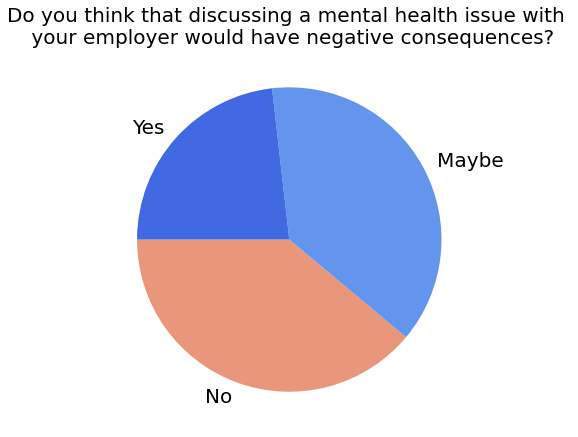

In [22]:
# Create Pie Chart
# Pick Colors
colors = ['darksalmon', 'cornflowerblue','royalblue' ]

# Create plot
fig = plt.figure(figsize =(10, 7))
plt.pie(neg_val_counts, 
        labels = neg_val_counts.index, 
        colors = colors,
        startangle = 180, 
        textprops = {'fontsize':20})

# Use survey question for title
plt.title("Do you think that discussing a mental health issue with \n your employer would have negative consequences?",
         fontsize = 20)  

# show plot
plt.show()

The pie chart above simply illustrates how employees view the prospect of discussing their mental health with their employer. A little under a quarter of employees feel there would be negative consequences for discussing a mental health issue. However, uncertainty is of equal concern. The graph essentially shows that majority of employees feel either their own mental health is either an unsafe to topic about, or apotentially unsafe topic. 

In [23]:
# Create Bar chart to compare work interference along side atitudes of negative consequences
# Subset consequence responses for yes and no separately
yes_con = df[df['mental_health_consequence']== 'Yes']
no_con = df[df['mental_health_consequence'] == 'No']

# View counts to choose numbers to rearrange rows for bars
yes_con['work_interfere'].value_counts()


Sometimes    135
Often         50
Never         38
Rarely        37
Name: work_interfere, dtype: int64

In [24]:
# Create count as new var and Reset Index 
yes_count= yes_con['work_interfere'].value_counts().reset_index()
# Add column to sort bars in order of severity
yes_count['Order'] = [3,4,1,2]

# Sort and view
yes_sorted= yes_count.sort_values(by = 'Order')
yes_sorted

,index,work_interfere,Order
2,Never,38,1
3,Rarely,37,2
0,Sometimes,135,3
1,Often,50,4


In [25]:
# Check counts for no responses to create new order column later
no_con['work_interfere'].value_counts()

Sometimes    145
Never         97
Rarely        71
Often         41
Name: work_interfere, dtype: int64

In [26]:
# Create new vars and Reset Index 
no_count= no_con['work_interfere'].value_counts().reset_index()
# Add column to sort bars in order of severity
no_count['Order'] = [3,1,2,4]

# Sort and view
no_sorted= no_count.sort_values(by = 'Order')
no_sorted

,index,work_interfere,Order
1,Never,97,1
2,Rarely,71,2
0,Sometimes,145,3
3,Often,41,4


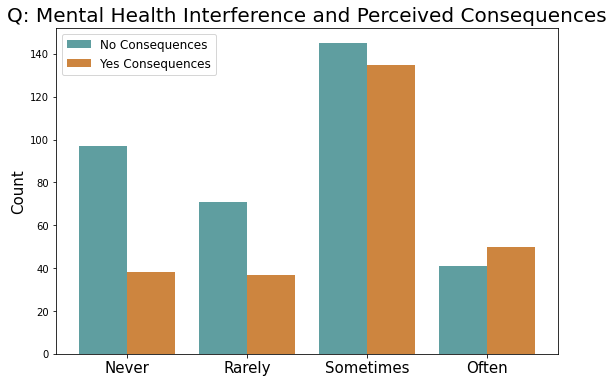

In [27]:
# Make data arrays
yes = yes_sorted.iloc[:,1]
no = no_sorted.iloc[:,1]
x = office_int['index']

# Size 
plt.figure(figsize= (9,6))

# Set columns
N = 4
ind = np.arange(N) 
width = 0.4

# Set bars
bar1 = plt.bar(ind, no, width, color = 'cadetblue')
bar2 = plt.bar(ind+width, yes, width, color='peru')


# Create Titles, Axis Labels, and Legend
plt.title('Q: Mental Health Interference and Perceived Consequences', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
  
plt.xticks(ind+.2, x, fontsize = 15)
plt.legend((bar1, bar2), ('No Consequences', 'Yes Consequences') , fontsize = 12)
plt.show()

The graph above illustrates how distributions for work interference differ between groups. One group being those that report anticipating no negative consequences due to discussing their mental health, and one group that does. The visualization show one difference of note, for those who report interference from mental health often. The difference suggests that those with more incidents, or experience with mental health struggles, feel less confident they can talk with their employers about it without risk. 

### Concluding Remarks  
The graphs completed appear to lend confidence that our sample ages are reflective of workplaces ages. The visuals also lend confidence that mental health struggles, are indeed, a common experience which interferes with work performance. The visuals also showed that the majority of workers are not confident they can talk to their employer about their mental health without consequence.